In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [3]:
from k3pi_utilities.helpers import ban_root
ban_root()

True

In [4]:
from k3pi_utilities import variables as vars
from k3pi_utilities import buffer, selective_load
from k3pi_config.modes import gcm, MODE
import numpy as np
import matplotlib.pyplot as plt
from analysis import model_generated

/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
from analysis import final_selection
from k3pi_config import config
config.optimised_selection = True
config.candidates_selection = True

In [14]:
with MODE('MagBoth', 1516, 'RS'):
    sel = final_selection.get_final_selection()
    data = gcm().get_data([vars.ltime(gcm().D0)])[vars.ltime(gcm().D0)][sel]
    gen = model_generated.get_model()[vars.ltime(gcm().D0)]

INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5


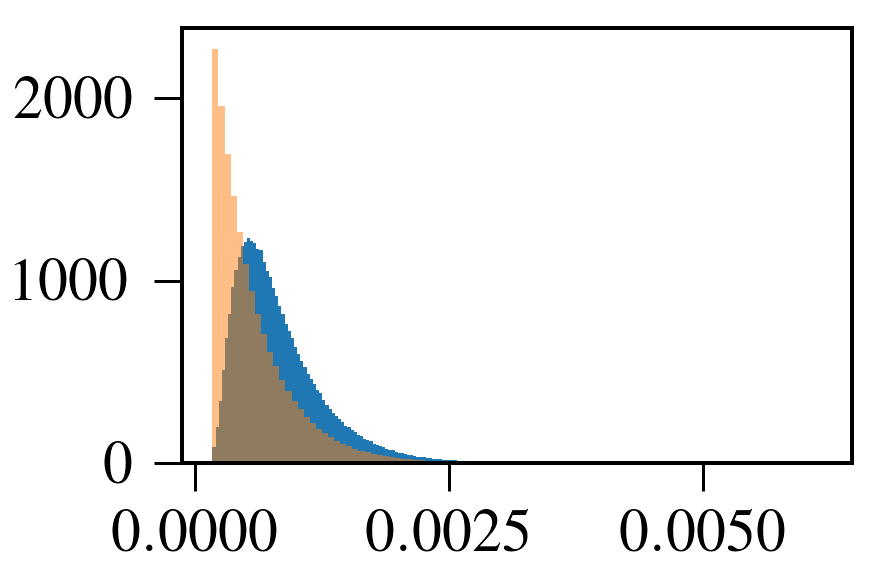

In [11]:
with MODE('MagBoth', 1516, 'RS'):
    plt.hist(data, bins=100, normed=True);
    plt.hist(gen, bins=100, normed=True,alpha=0.5);

In [15]:
c = 'D0_Loki_BPVLTIME'
mi, ma = gen.min(), gen.max()

data = (data - mi) / (ma - mi) + 1.
gen = (gen - mi) / (ma - mi) + 1.

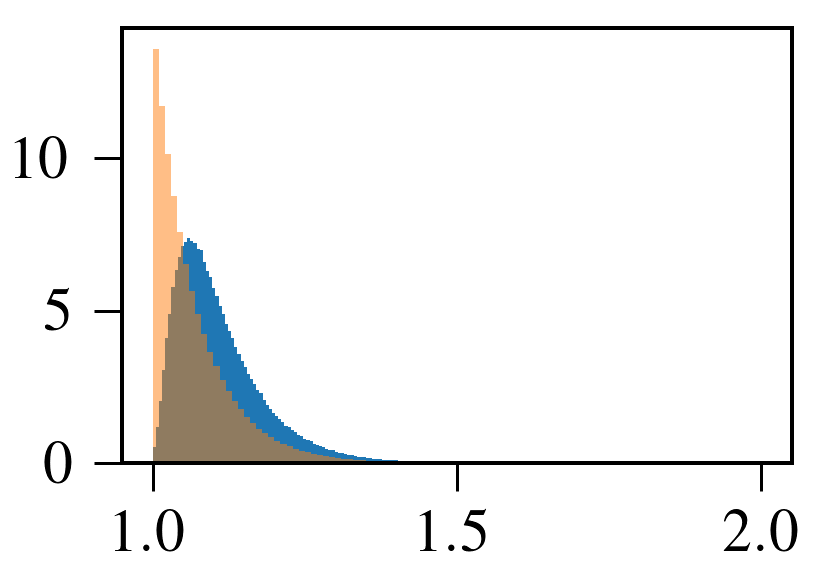

In [16]:
with MODE('MagBoth', 1516, 'RS'):
    plt.hist(data, bins=100, normed=True);
    plt.hist(gen, bins=100, normed=True,alpha=0.5);

In [44]:
tgen = gen.sample(100000)
tdata = data[sel].sample(100000)

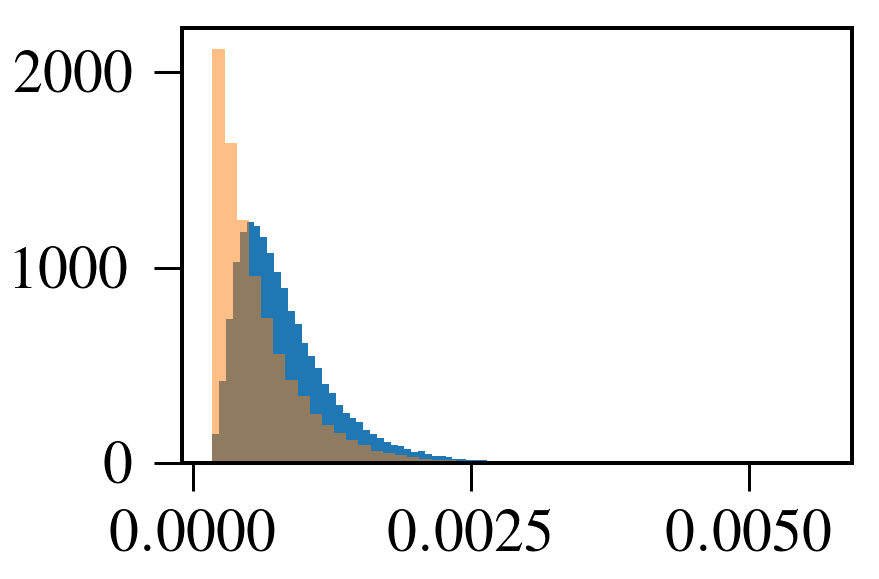

In [45]:
plt.hist(tdata, bins=50, normed=True);
plt.hist(tgen, bins=50, normed=True, alpha=0.5);

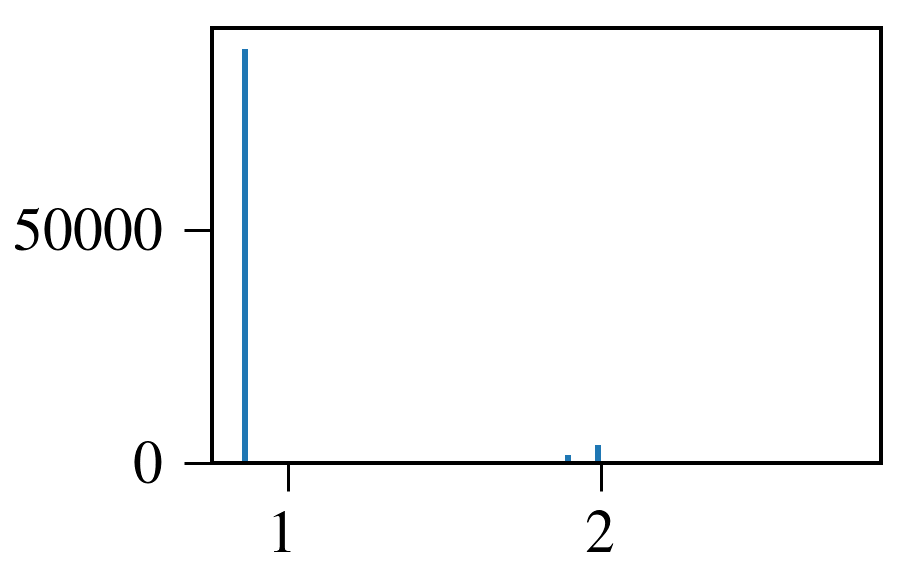

In [46]:
from hep_ml.reweight import GBReweighter, BinsReweighter
reweighter = GBReweighter();
reweighter.fit(original=tgen.values, target=tdata.values);
plt.hist(reweighter.predict_weights(tgen), bins = 100);

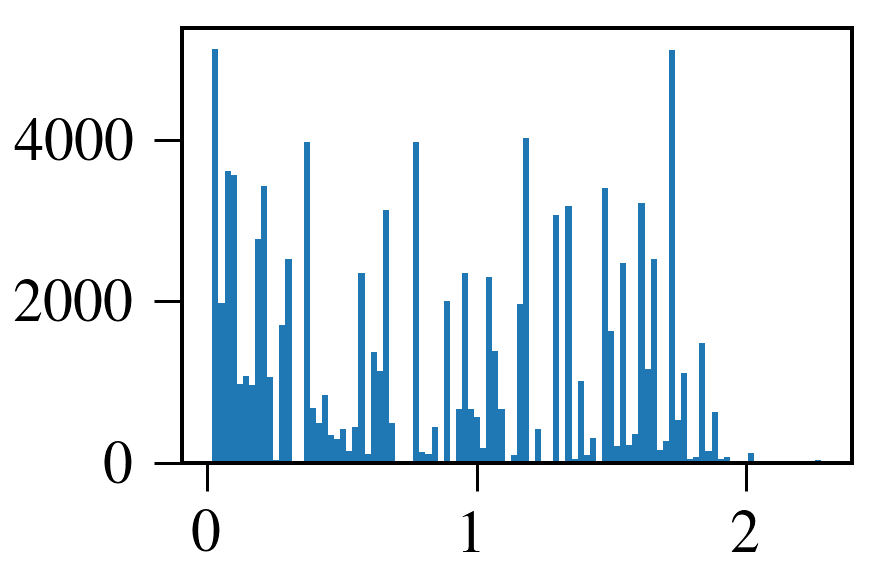

In [49]:
reweighter = GBReweighter();
reweighter.fit(original=tgen.values*1000., target=tdata.values*1000.);
plt.hist(reweighter.predict_weights(tgen*1000.), bins = 100);
weights = reweighter.predict_weights(gen*1000)

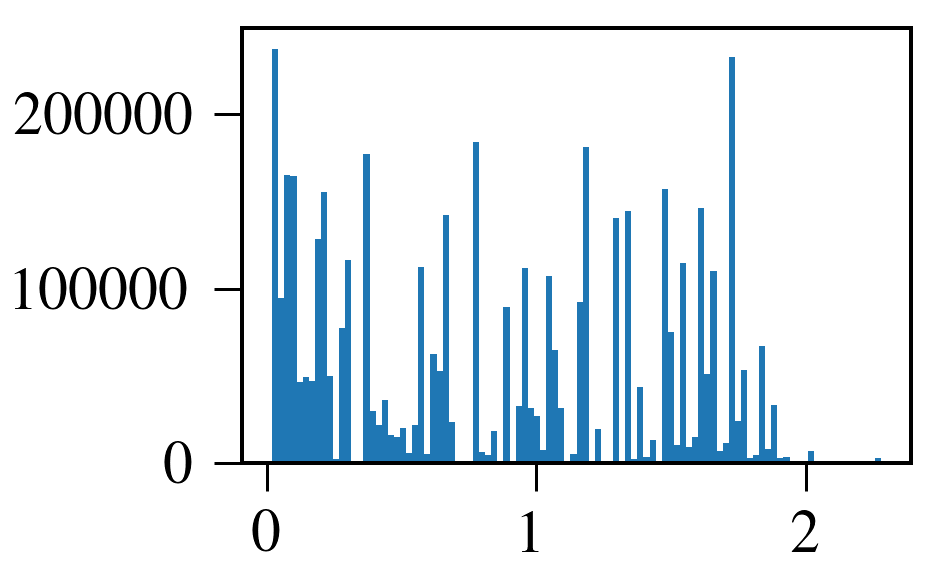

In [50]:
plt.hist(weights, bins = 100);

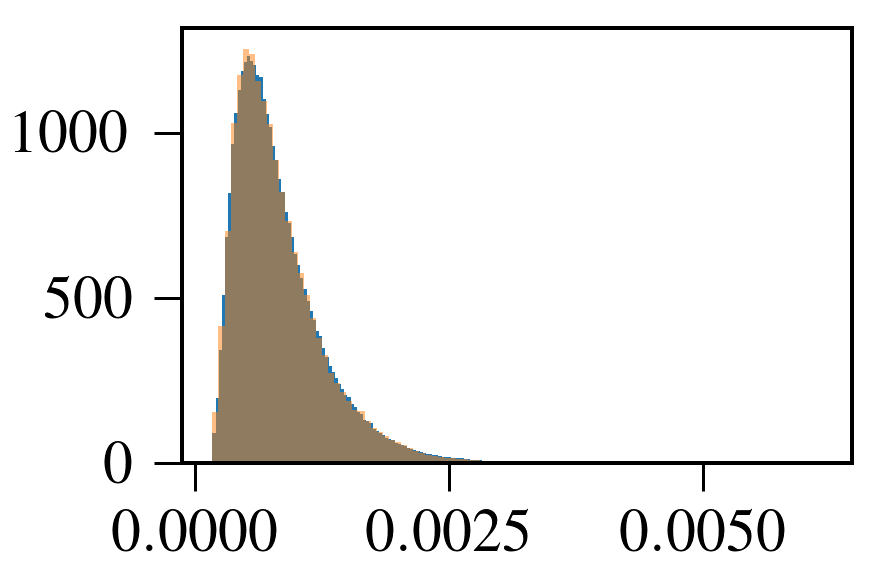

In [53]:
plt.hist(data, bins = 100, normed=True);
plt.hist(gen, bins = 100, alpha=0.5, normed=True, weights=weights);

In [39]:
np.isfinite(tdata).all()

True

In [40]:
np.isfinite(tgen).all()

True

In [7]:
data

,D0_M,delta_m_dtf
0,1875.030533,145.117493
1,1864.942761,145.831055
2,1863.853736,145.621091
3,1874.157010,145.355588
4,1864.102934,145.834329
5,1875.450079,145.222829
6,1866.930034,145.209542
7,1867.663313,145.117978
8,1859.274791,145.338193
9,1861.750520,145.563246


In [1]:
import sys

In [3]:
sys.modules['ROOT']=None

In [8]:
import root_numpy

Welcome to ROOTaaS 6.06/02


In [11]:
try:
    del sys.modules['ROOT']
except:
    pass

In [56]:
a,b = [np.random.normal(size=50000),np.random.normal(size=50000)]

In [55]:
%timeit np.diff(arr.transpose(), axis=0)

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 61.6 µs per loop


In [54]:
%timeit arr[:,0] - arr[:,1]

The slowest run took 8.54 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 49.1 µs per loop


In [49]:
arr[:,0]

array([ 0.80393328,  0.21815769,  0.5218102 , ...,  0.01980701,
        1.64855848, -0.32619173])

In [52]:
np.diff(arr.transpose(), axis=0)

array([[ 0.37634414,  0.33267421, -0.674767  , ...,  1.62659834,
        -2.71229571, -1.5309351 ]])

In [57]:
%timeit a-b

The slowest run took 6.91 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 47.6 µs per loop


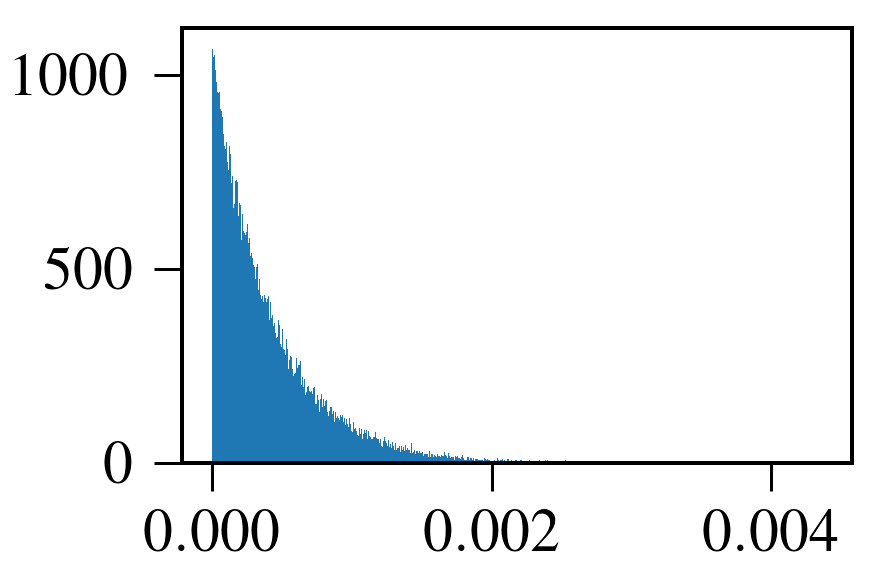

In [64]:
plt.hist(np.random.exponential(0.00040995, size=100000), bins=1000);

In [60]:
np.random.exponential(0.00040995)

0.0006830881283875539

ImportError: cannot import name t_gen_phasespaced